**Vamos experimentar agora o algoritmo Decision Tree?**

In [ ]:
!pip -q install yellowbrick

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [3]:
import pickle
with open('/content/sample_data/wheaterNominal.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

**Importando a biblioteca de ajuste de hiperparâmetros**

In [4]:
from sklearn.model_selection import GridSearchCV

In [7]:
params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
}

modelo = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

In [8]:
modelo.fit(X_treino, y_treino)
print(modelo.best_params_)
print(modelo.best_score_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'gini', 'max_depth': None, 'max_features': None}
1.0


**Agora precisamos rodar a árvore com os hiperparâmetros obtidos**

In [9]:
modelo= DecisionTreeClassifier(max_depth=10, criterion='gini', max_features=0.4)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=10, max_features=0.4)



> **Vamos testar o modelo?**



In [10]:

previsoes = modelo.predict(X_teste)

In [11]:
previsoes

array([ True,  True, False])



> **Será se o modelo acertou?**



In [12]:
y_teste

array([ True,  True, False])

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

1.0

In [14]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[1, 0],
       [0, 2]])

1.0

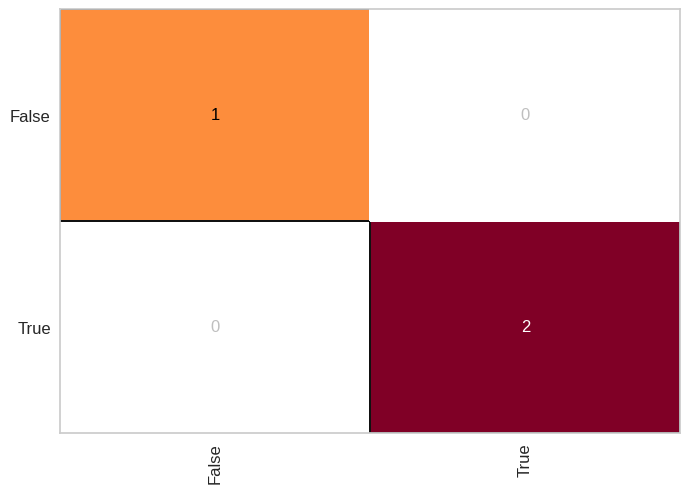

In [15]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [16]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         1
        True       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



TypeError: ignored

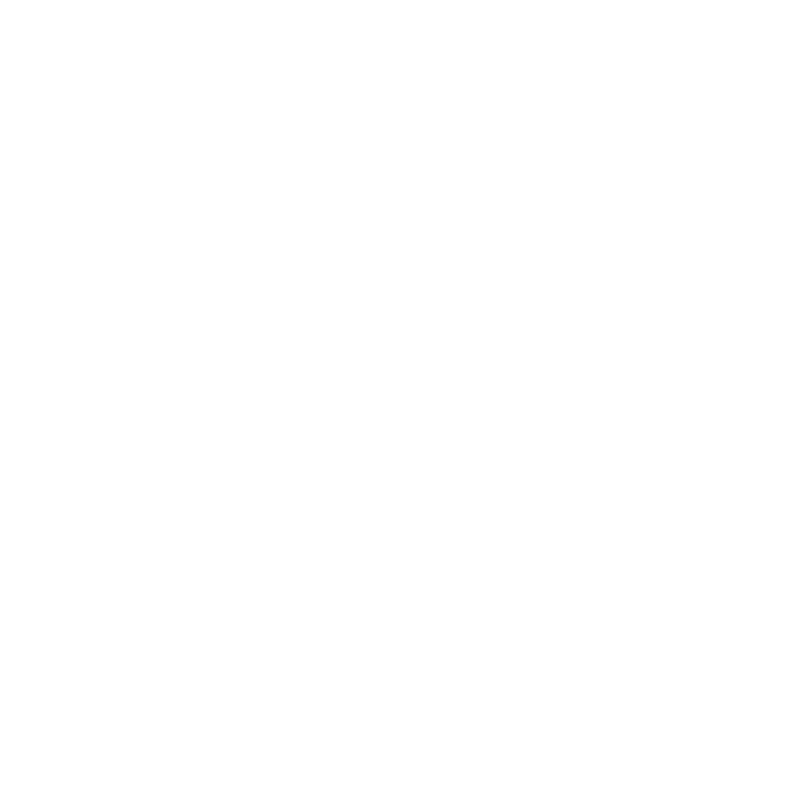

In [18]:
from sklearn import tree
previsores = ['outlook', 'temperature', 'humidity']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_, filled=True);